In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import Database 
from sqlalchemy import create_engine
from sqlalchemy.orm import close_all_sessions
import config

## Loading Data

In [2]:
# Creating Database Connection

# database_str = f'postgres://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_ADDRESS}:{POSTGRES_PORT}/{POSTGRES_DBNAME}'

# engine = create_engine(database_str)

In [3]:
# Reading Data from CSV and assign to Dataframe
combined_df = pd.read_csv('../SQL/combined_wine_quality.csv')

#Viewing Dataframe
combined_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,id
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,20
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,70
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,red,796
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,red,1245
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,red,1089
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,red,563
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,1296
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,red,69
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,red,528
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red,1203


## Exploring Data

In [4]:
# List column Names
list(combined_df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'color',
 'id']

In [5]:
# Checking for Null/Empty Values

combined_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
id                      0
dtype: int64

In [6]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,id
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,2043.535632
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,1436.926393
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,813.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1650.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,3274.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,4898.000000


## Visualizing Data

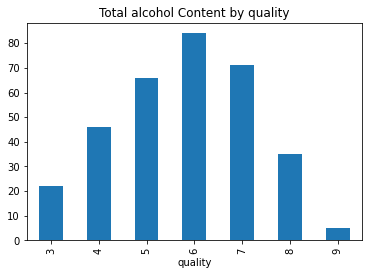

In [7]:
combined_df.groupby('quality')['alcohol'].nunique().plot(kind='bar')
plt.title("Total alcohol Content by quality")
plt.show()

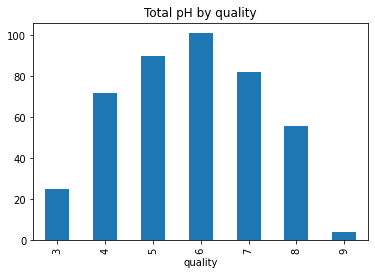

In [8]:
combined_df.groupby('quality')['pH'].nunique().plot(kind='bar')
plt.title("Total pH by quality")
plt.show()

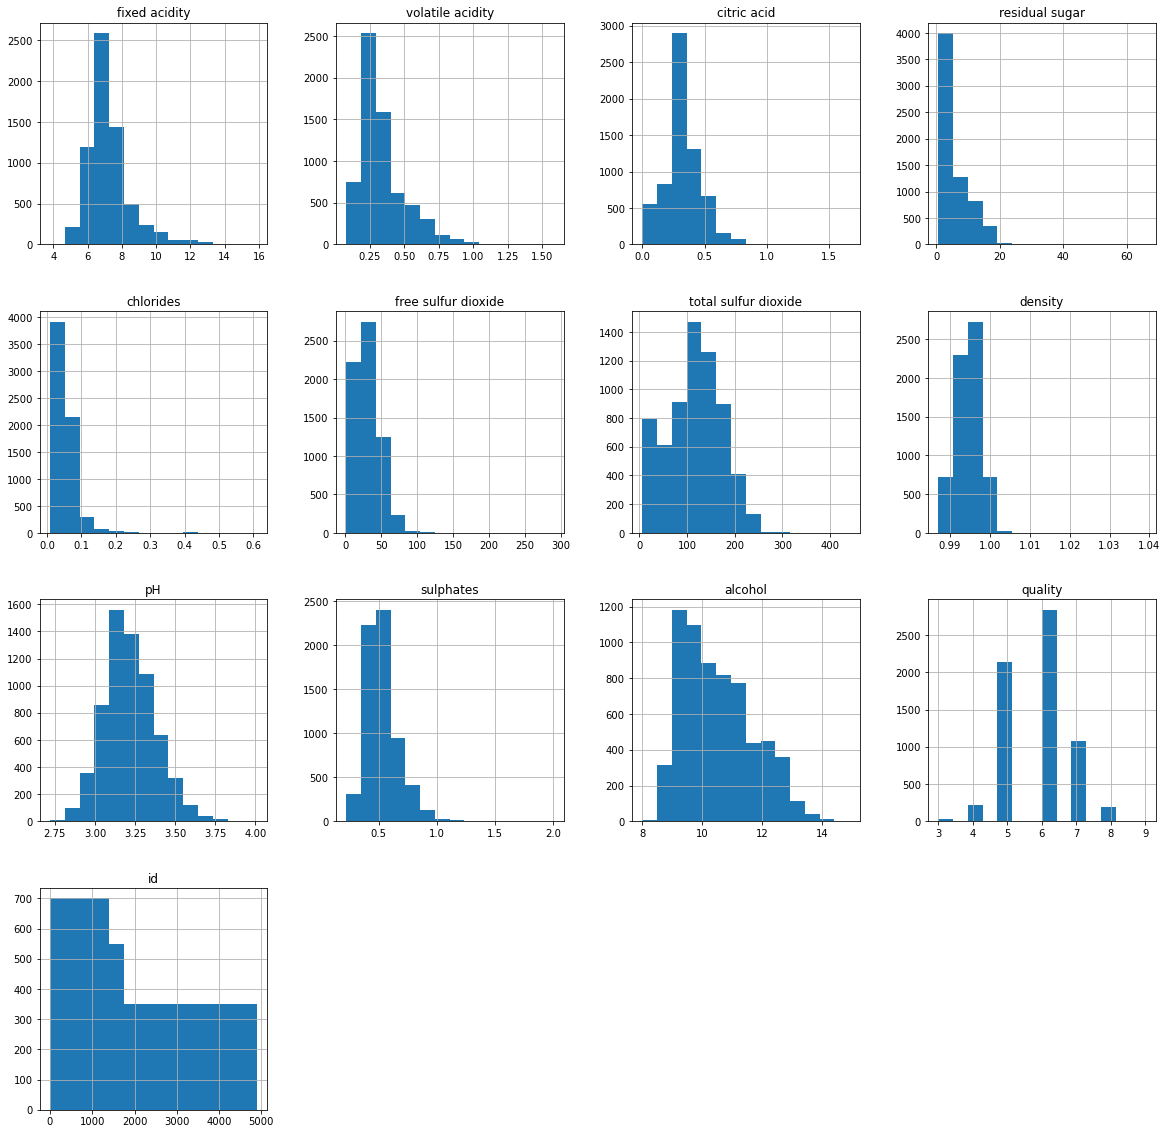

In [9]:
combined_df.hist(bins= 14, figsize=(20,20))
plt.show()

## Grouping Data to apply Clasification Model

In [10]:
# Copying Dataframe to new Dataframe

grade_df = combined_df.copy() 

grade_conditions = [
    (grade_df['quality'] <=5),
    (grade_df['quality'] <=6),
    (grade_df['quality'] >6)
]

grade_values = ['low', 'medium','high']

grade_df['grade'] = np.select(grade_conditions, grade_values)

grade_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,id,grade
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,red,20,low
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,red,70,medium
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,red,796,high
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,red,1245,medium
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,red,1089,medium
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,red,563,high
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,1296,medium
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,red,69,low
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,red,528,low
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,red,1203,high


## Visualizing Grouped data

In [11]:
grade_df['grade'].value_counts()

medium    2836
low       2384
high      1277
Name: grade, dtype: int64

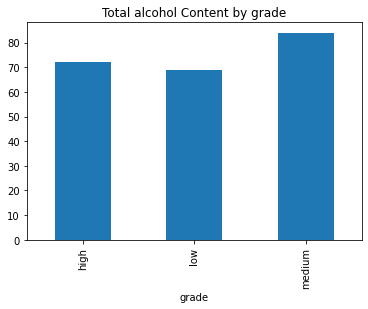

In [12]:
grade_df.groupby('grade')['alcohol'].nunique().plot(kind='bar')
plt.title("Total alcohol Content by grade")
plt.show()

## Dropping insignifient columns which doesn't contribute to quality of the wine (id & color)

In [13]:
grade_df.drop(['id', 'color'], axis=1, inplace=True)

<AxesSubplot:>

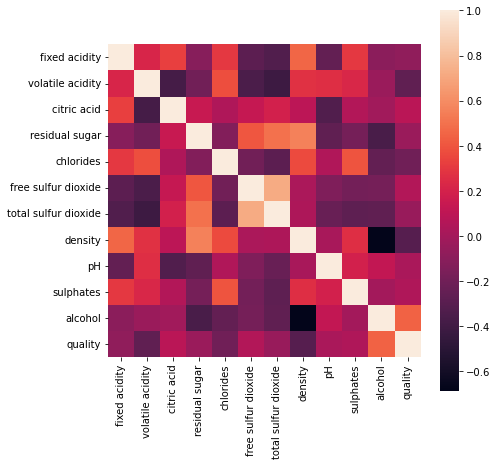

In [14]:
correlation_matrix = grade_df.corr()
correlation_matrix['quality'].sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

sns.heatmap(correlation_matrix, vmax=1.0, square=True)

## Importing ML Dependencies

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,balanced_accuracy_score, plot_confusion_matrix
from collections import Counter
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

## Splitting Training and Test

In [16]:
target = ["grade"]

x = {'Current': 'grade'}  
 
test_df = grade_df.replace(x)

x = dict.fromkeys(['alcohol', 'pH', 'sulphates', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'], 'grade')

test_df = grade_df.copy().replace(x)

test_df.reset_index(inplace=True, drop=True)

# Create features
X = test_df.drop(['grade'], axis=1)
X = pd.get_dummies(X)

#Create target
y = test_df['grade']

In [17]:
# Create features
X = test_df.drop(['grade', 'quality'], axis=1)
X = pd.get_dummies(X)

#Create target
y = test_df[['grade']]

In [18]:
test_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,low
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6,medium
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,high
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,medium
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,6,medium
5,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,high
6,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,medium
7,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4,low
8,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5,low
9,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,7,high


In [19]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## Setting 4:1 ratio split b/w Training and Test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

print("Training:",Counter(y_train['grade']))

print("Test:",Counter(y_test['grade']))

Training: Counter({'medium': 2127, 'low': 1788, 'high': 957})
Test: Counter({'medium': 709, 'low': 596, 'high': 320})


## Decision Tree Classifier

In [21]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [22]:
print("Accuracy:",accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.6381538461538462


In [23]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

        high       0.60      0.59      0.60       320
         low       0.68      0.68      0.68       596
      medium       0.62      0.63      0.62       709

    accuracy                           0.64      1625
   macro avg       0.63      0.63      0.63      1625
weighted avg       0.64      0.64      0.64      1625



## confusion matrix for Decision Tree Classifier

In [24]:
cm = confusion_matrix(y_test, y_pred_dtc)
cm_df = pd.DataFrame(
    cm, index=['low', 'medium', 'high'], columns=['low', 'medium', 'high'])

cm_df

,low,medium,high
low,190,25,105
medium,25,403,168
high,103,162,444


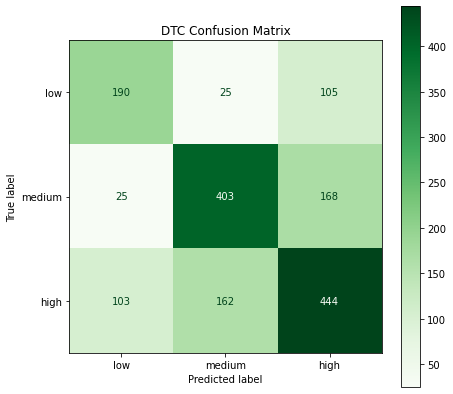

In [25]:
fig = plot_confusion_matrix(dtc, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('DTC Confusion Matrix')
plt.savefig('output/dtc_confusion_matrix.png')
plt.show()

## Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.7181538461538461


In [27]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        high       0.77      0.61      0.68       320
         low       0.77      0.74      0.75       596
      medium       0.67      0.75      0.71       709

    accuracy                           0.72      1625
   macro avg       0.73      0.70      0.71      1625
weighted avg       0.72      0.72      0.72      1625



In [28]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm_df = pd.DataFrame(
    cm, index=['low', 'medium', 'high'], columns=['low', 'medium', 'high'])

cm_df

,low,medium,high
low,194,8,118
medium,6,442,148
high,53,125,531


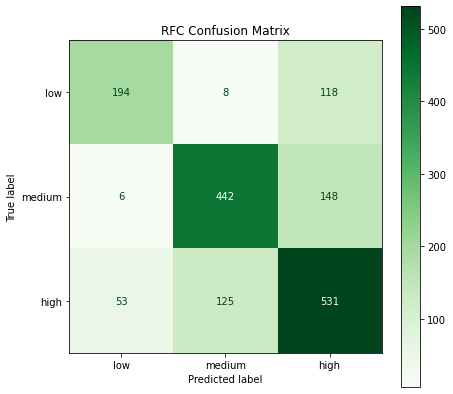

In [29]:
fig = plot_confusion_matrix(rfc, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('RFC Confusion Matrix')
plt.savefig('output/rfc_confusion_matrix.png')
plt.show()

## Balanced Random Forest Classifier

In [30]:
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)
brfc.fit(X_train, y_train)
y_pred_brfc = brfc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_rfc))

Accuracy: 0.7181538461538461


## Display the confusion matrix 

In [31]:
cm = confusion_matrix(y_test, y_pred_brfc)
cm_df = pd.DataFrame(
    cm, index=['low', 'medium', 'high'], columns=['low', 'medium', 'high'])

cm_df

,low,medium,high
low,256,10,54
medium,29,476,91
high,172,172,365


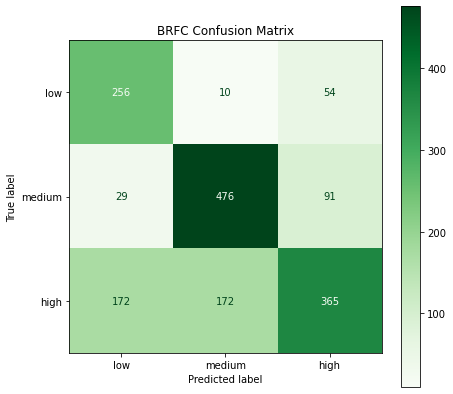

In [32]:
fig = plot_confusion_matrix(brfc, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('BRFC Confusion Matrix')
plt.savefig('output/brfc_confusion_matrix.png')
plt.show()

## Gradient Boosting Classifier

In [33]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_gbc))

Accuracy: 0.6270769230769231


In [34]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

        high       0.65      0.46      0.54       320
         low       0.69      0.66      0.68       596
      medium       0.58      0.67      0.62       709

    accuracy                           0.63      1625
   macro avg       0.64      0.60      0.61      1625
weighted avg       0.63      0.63      0.62      1625



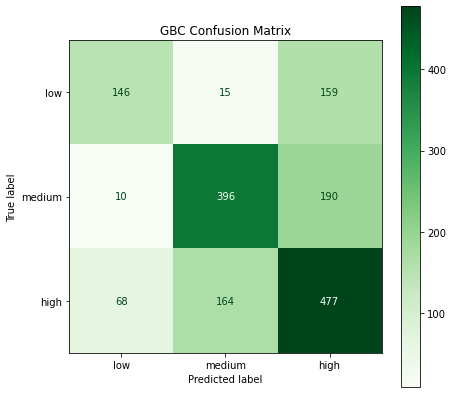

In [35]:
fig = plot_confusion_matrix(gbc, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('GBC Confusion Matrix')
plt.savefig('output/gbc_confusion_matrix.png')
plt.show()

## Over Sampling

In [36]:
ros = RandomOverSampler(sampling_strategy='auto')
x_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(Counter(y_resampled['grade']))

Counter({'medium': 2127, 'high': 2127, 'low': 2127})


In [37]:
# Train the Logistic Regression model using the resampled data
lr = LogisticRegression(random_state=1)
lr.fit(x_resampled, y_resampled)

y_pred_lr = lr.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_lr))

Accuracy: 0.48184615384615387


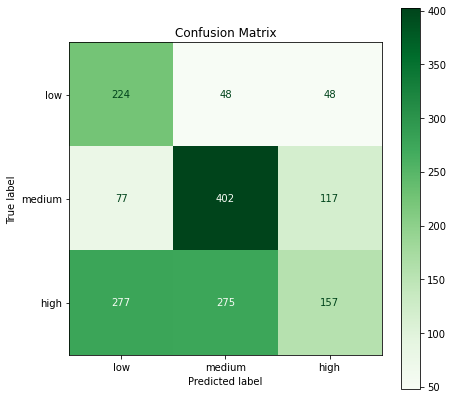

In [38]:
fig = plot_confusion_matrix(lr, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## SMOTE Oversampling

In [39]:
oversampling = SMOTE(random_state=10, sampling_strategy='auto')

X_over, y_over = oversampling.fit_resample(X_train, y_train)
print(Counter(y_over['grade']))

Counter({'medium': 2127, 'high': 2127, 'low': 2127})


In [40]:
smote_clf = LogisticRegression(random_state=1)
smote_clf.fit(X_over, y_over)
y_pred_smote = smote_clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_smote))

Accuracy: 0.5089230769230769


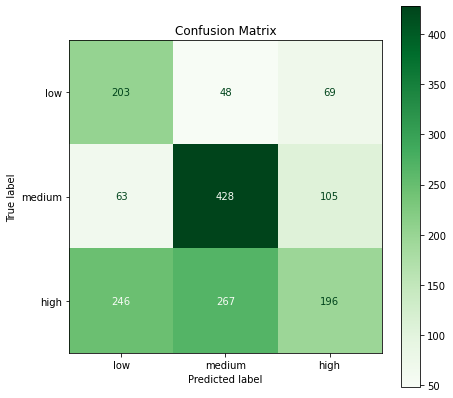

In [41]:
fig = plot_confusion_matrix(smote_clf, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

Under Sampling

In [42]:
us = ClusterCentroids(random_state=1, sampling_strategy='auto')
X_under, y_under = us.fit_resample(X_train, y_train)
print(Counter(y_under['grade']))

Counter({'high': 957, 'low': 957, 'medium': 957})


In [43]:
# Train the Logistic Regression model using the resampled data
classifier_cluster_centroid = LogisticRegression(random_state=1)
classifier_cluster_centroid.fit(X_under, y_under)
y_pred_us = classifier_cluster_centroid.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_us))

Accuracy: 0.464


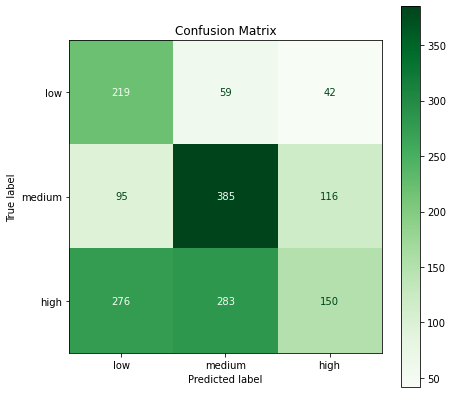

In [44]:
fig = plot_confusion_matrix(classifier_cluster_centroid, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

## Combination of Over and Under Sampling

In [45]:
combined = SMOTEENN(random_state = 42, sampling_strategy='all', smote=oversampling) # smote object is over
X_combined, y_combined = combined.fit_resample(X_train, y_train)
print(Counter(y_combined['grade']))

Counter({'high': 1375, 'low': 724, 'medium': 427})


In [46]:
# Train the Logistic Regression model using the resampled data
classifier_combined = LogisticRegression(random_state=1)
classifier_combined.fit(X_combined, y_combined)
y_pred_combined = classifier_combined.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_combined))

Accuracy: 0.35815384615384616


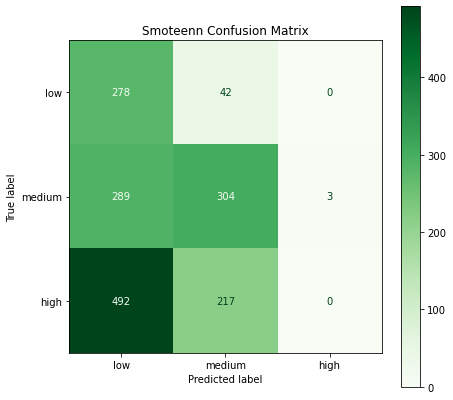

In [47]:
fig = plot_confusion_matrix(classifier_combined, X_test, y_test, display_labels=['low', 'medium', 'high'], cmap='Greens')
plt.title('Smoteenn Confusion Matrix')
plt.show()

## Features comparison b/w the models

(<AxesSubplot:title={'center':'Feature Importance by Decision Tree'}>,
 Text(0.5, 1.0, 'Feature Importance by Decision Tree'))

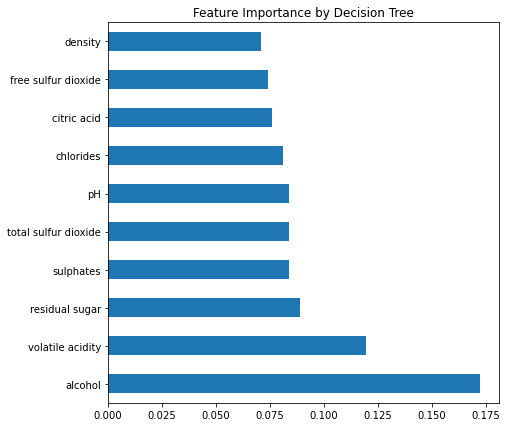

In [48]:
decision_tree_features = pd.Series(dtc.feature_importances_, index=X.columns)
decision_tree_features.nlargest(10).plot(kind='barh'), plt.title('Feature Importance by Decision Tree')

(<AxesSubplot:title={'center':'Feature importance by Random Forest'}>,
 Text(0.5, 1.0, 'Feature importance by Random Forest'))

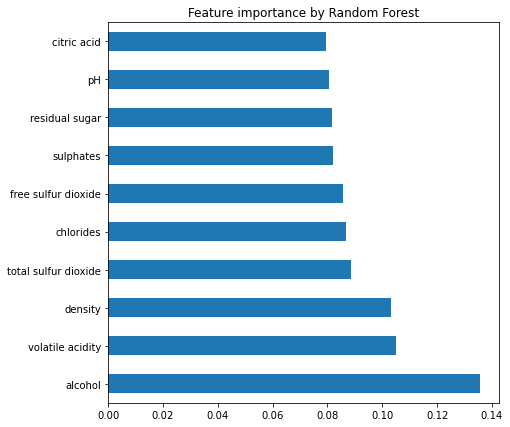

In [49]:
random_forest_features = pd.Series(rfc.feature_importances_, index=X.columns)
random_forest_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Random Forest')

(<AxesSubplot:title={'center':'Feature importance by Balanced Random Forest'}>,
 Text(0.5, 1.0, 'Feature importance by Balanced Random Forest'))

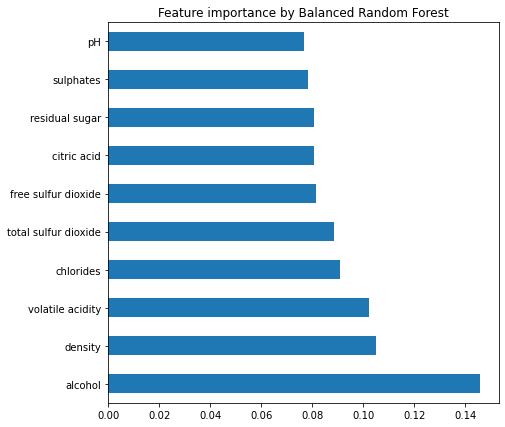

In [50]:
balanced_random_forest_features = pd.Series(brfc.feature_importances_, index=X.columns)
balanced_random_forest_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Balanced Random Forest')

(<AxesSubplot:title={'center':'Feature importance by Gradient Boosting Classifier'}>,
 Text(0.5, 1.0, 'Feature importance by Gradient Boosting Classifier'))

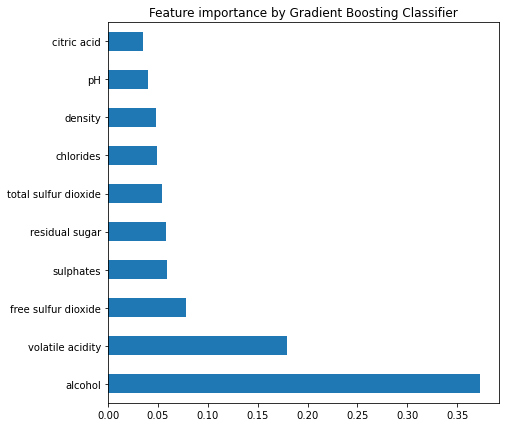

In [51]:
gradient_boosting_classifier_features = pd.Series(gbc.feature_importances_, index=X.columns)
gradient_boosting_classifier_features.nlargest(10).plot(kind='barh'), plt.title('Feature importance by Gradient Boosting Classifier')

## Comparing Model Features in Single graph

<AxesSubplot:>

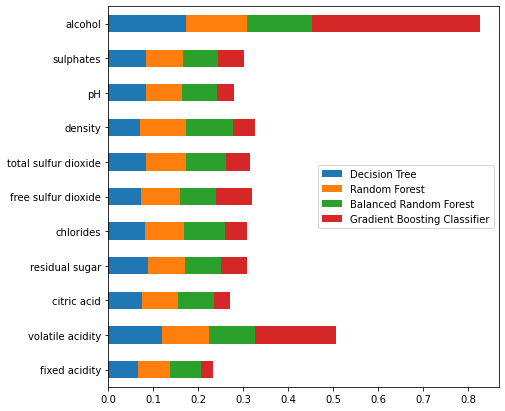

In [52]:
compare_features_by_model = pd.DataFrame({'Decision Tree': decision_tree_features, 'Random Forest': random_forest_features, 'Balanced Random Forest': balanced_random_forest_features, 'Gradient Boosting Classifier': gradient_boosting_classifier_features})

compare_features_by_model.plot(kind='barh', stacked=True)

## Compare Features b/w Grade

In [53]:
low_grade_wine_df = grade_df[grade_df['grade'] == 'low']
medium_grade_wine_df = grade_df[grade_df['grade'] == 'medium']
high_grade_wine_df = grade_df[grade_df['grade'] == 'high']

low_grade_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,7.329992,0.397410,0.304178,5.646225,0.064404,29.480495,119.277055,0.995756,3.214522,0.524270,9.873544,4.884228
std,1.268400,0.187971,0.162936,4.917239,0.042812,19.844383,61.887639,0.002464,0.161311,0.143764,0.841746,0.357197
min,4.200000,0.100000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987220,2.740000,0.250000,8.000000,3.000000
25%,6.500000,0.260000,0.210000,1.800000,0.043000,14.000000,68.000000,0.993960,3.110000,0.440000,9.300000,5.000000
50%,7.100000,0.337500,0.295000,2.900000,0.052000,26.000000,124.000000,0.996000,3.200000,0.500000,9.600000,5.000000
75%,7.800000,0.500000,0.400000,8.525000,0.077000,42.000000,167.000000,0.997540,3.310000,0.580000,10.400000,5.000000
max,15.900000,1.580000,1.000000,23.500000,0.611000,289.000000,440.000000,1.003150,3.900000,2.000000,14.900000,5.000000


In [54]:
medium_grade_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.000000,2836.00000,2836.000000,2836.000000,2836.000000,2836.000000,2836.0
mean,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.41079,0.994558,3.217726,0.532549,10.587553,6.0
std,1.291191,0.147080,0.142500,4.888237,0.030843,16.835507,55.45439,0.003035,0.161000,0.146741,1.126491,0.0
min,3.800000,0.080000,0.000000,0.700000,0.015000,1.000000,6.00000,0.987580,2.720000,0.230000,8.400000,6.0
25%,6.400000,0.210000,0.260000,1.800000,0.038000,18.000000,79.00000,0.992200,3.110000,0.430000,9.600000,6.0
50%,6.900000,0.270000,0.310000,3.100000,0.046000,29.000000,117.00000,0.994700,3.210000,0.510000,10.500000,6.0
75%,7.600000,0.370000,0.390000,8.300000,0.060250,42.000000,156.00000,0.996740,3.320000,0.600000,11.400000,6.0
max,14.300000,1.040000,1.660000,65.800000,0.415000,112.000000,294.00000,1.038980,4.010000,1.950000,14.000000,6.0


In [55]:
high_grade_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000


## Write Output to file

In [56]:
combined_mean_df = pd.DataFrame({'low': low_grade_wine_df.mean(), 'medium': medium_grade_wine_df.mean(), 'high': high_grade_wine_df.mean()})

combined_mean_df.to_csv('output/combined_mean_df.csv')

combined_mean_df.head(12)

,low,medium,high
fixed acidity,7.329992,7.177257,7.085709
volatile acidity,0.397410,0.313863,0.289170
citric acid,0.304178,0.323583,0.334628
residual sugar,5.646225,5.549753,4.827721
chlorides,0.064404,0.054157,0.044576
free sulfur dioxide,29.480495,31.165021,31.055208
total sulfur dioxide,119.277055,115.410790,109.891151
density,0.995756,0.994558,0.993027
pH,3.214522,3.217726,3.227651
sulphates,0.524270,0.532549,0.541488


In [57]:
combined_clasification_report_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support'])
combined_clasification_report_df.loc['Decision Tree'] = dtc.score(X_test, y_test)
combined_clasification_report_df.loc['Random Forest'] = rfc.score(X_test, y_test)
combined_clasification_report_df.loc['Balanced Random Forest'] = brfc.score(X_test, y_test)
combined_clasification_report_df.loc['Gradient Boosting Classifier'] = gbc.score(X_test, y_test)

combined_clasification_report_df.head().to_csv('output/combined_clasification_report_df.csv')

combined_clasification_report_df.head()


,Accuracy,Precision,Recall,F1-Score,Support
Decision Tree,0.638154,0.638154,0.638154,0.638154,0.638154
Random Forest,0.718154,0.718154,0.718154,0.718154,0.718154
Balanced Random Forest,0.675077,0.675077,0.675077,0.675077,0.675077
Gradient Boosting Classifier,0.627077,0.627077,0.627077,0.627077,0.627077


## Results
- Model comparision report

![Model_comparison_report](output/ML_Comparison.png)

- Random Forest Model from Sklearn gives better prediction results compare to other models

![classification Report](output/classification_report.png)

- Higher the Alcohol content the Grade of wine is better
- Lower the Sulfur Dioxide the Grade of the wine is better (High quality wines has low SO2)

![feature_comparison_by_grade](output/feature_comparison_by_grade.png)